# EDA - Kickstarter ---Lyes BOUALI

Nous devons analyser les variables présentes dans ce dataset pour pouvoir prédire la réussite des projets lancés par la plate-forme ***Kickstarter*** dans le cadre du financement participatif.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Découverte des données

Chargement des données dans un dataFrame initial en gardant l'indice des lignes:

In [2]:
data_init = pd.read_csv('dataset.csv')

In [3]:
print(" Le dataset contient {} entrées représentant des projets et {} variables décrivant ces projets.".format(data_init.shape[0],data_init.shape[1]))

 Le dataset contient 378661 entrées représentant des projets et 15 variables décrivant ces projets.


In [4]:
data_init.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
data_init.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [6]:
data_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


Nous remarquons que les variables ***deadline*** et ***launched*** sont de type 'object'. Ils devront être transfomés en type 'datetime' pour être utilisable. 

Entre autre, une nouvelle variable peut être ajoutée pour avoir la durée du projet en jour.
### Note: 
Cette manipulation sera réalisée dans la partie 4.c (Mise en forme des données)

In [7]:
#data_init.describe(include='all').T
data_init.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,378661.0,1.074731e+09,6.190862e+08,5971.00,5.382635e+08,1.075276e+09,1.610149e+09,2.147476e+09
goal,378661.0,4.908079e+04,1.183391e+06,0.01,2.000000e+03,5.200000e+03,1.600000e+04,1.000000e+08
pledged,378661.0,9.682979e+03,9.563601e+04,0.00,3.000000e+01,6.200000e+02,4.076000e+03,2.033899e+07
backers,378661.0,1.056175e+02,9.071850e+02,0.00,2.000000e+00,1.200000e+01,5.600000e+01,2.193820e+05
usd pledged,374864.0,7.036729e+03,7.863975e+04,0.00,1.698000e+01,3.947200e+02,3.034090e+03,2.033899e+07
usd_pledged_real,378661.0,9.058924e+03,9.097334e+04,0.00,3.100000e+01,6.243300e+02,4.050000e+03,2.033899e+07
usd_goal_real,378661.0,4.545440e+04,1.152950e+06,0.01,2.000000e+03,5.500000e+03,1.550000e+04,1.663614e+08


Nous remarquons que le count est différent pour ***usd pledged***. Cela indique que des données sont manquantes.

Les écarts type est très grands entre entre les variables 

## 2. Données dupliquées et manquantes

### a- Données dupliquées

In [8]:
print("Nous avons {} données dupliquées".format(data_init.duplicated().sum()))

Nous avons 0 données dupliquées


### b- Données manquantes

In [9]:
data_init.isna().sum().loc[data_init.isna().sum()!=0].apply(lambda x: x*100/data_init.shape[0]) #pour avoir le pourcentage


name           0.001056
usd pledged    1.002744
dtype: float64

|Attributs     | Pourcentage (%)|
---------------|------------
|name        | 0.001 |
|usd pledged | 1.003 |

&rarr; Nous avons 2 attributs ayant des données manquantes.
Le pourcentage des données manquantes pour la variable ***name*** peut être négligé.

Pour la variable ***usd pledged***, le pourcentage est aussi négligeable (1%). Dans la partie 4.a, nous allons réaliser une analyse pour décider si cette variable sera analysée par la suite ou non.

## 3. Gestion des outliers

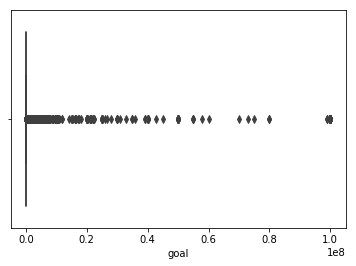

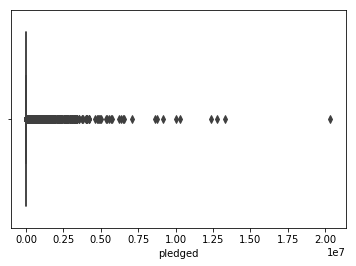

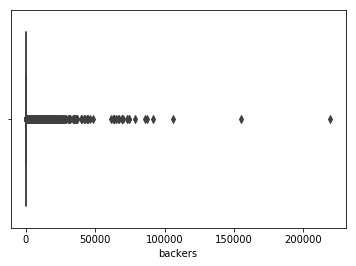

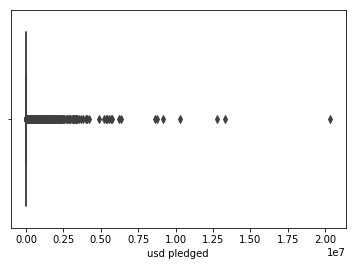

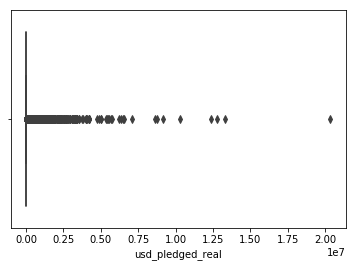

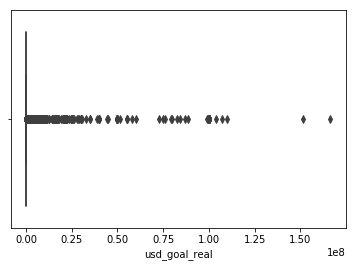

In [10]:
#data_init.boxplot(['goal', 'pledged', 'backers', 'usd pledged','usd_pledged_real', 'usd_goal_real'],figsize=(15,10))
#plt.semilogy()
sns.boxplot(data_init.goal)
plt.show()
sns.boxplot(data_init.pledged)
plt.show()
sns.boxplot(data_init.backers)
plt.show()
sns.boxplot(data_init['usd pledged'])
plt.show()
sns.boxplot(data_init.usd_pledged_real)
plt.show()
sns.boxplot(data_init.usd_goal_real)
plt.show()

Nous remarquons qu'il y a beaucoup d'outliers. Ces derniers sont des données atypique (et non pas des données aberrantes) qu'il faut prendre en charge dans notre analyse.

## 4. Mise en forme des données

In [11]:
data=data_init.copy() # Faire une copie du dataFrame qui contiendra le jeu de donnée netoyé. 

### a- Suppression des variables redondantes

In [12]:
print("Les variable \'usd pledged\' et \'usd_pledged_real\' ont {0:.2f}% de données identiques".format(data[data['usd pledged'] == data['usd_pledged_real']].shape[0]/data.shape[0]*100))
print("Les variable \'goal\' et \'usd_goal_real\' ont {0:.2f}% de données identiques".format(data[data['goal'] == data['usd_goal_real']].shape[0]/data.shape[0]*100))

Les variable 'usd pledged' et 'usd_pledged_real' ont 69.36% de données identiques
Les variable 'goal' et 'usd_goal_real' ont 78.00% de données identiques


Supression des variables ***usd pledged***, ***goal*** car c'est des variables presque redondantes à plus de 50%. La variable ***pledged*** donne les même informations que ***usd_pledged_real*** donc elle peut aussi être supprimer. 

In [13]:
data=data.drop(columns=['goal','pledged', 'usd pledged'])

### b- Changement des types en DataTime

In [14]:
data['launched'] = pd.to_datetime(data['launched'])
data['deadline'] = pd.to_datetime(data['deadline'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 12 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
launched            378661 non-null datetime64[ns]
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 34.7+ MB


### c- Création de la variable time_days

Ajout de la variable ***time_day*** donnant la durée des projets.

In [25]:
temp=(data['deadline']-data['launched'])
data["time_days"]=pd.to_timedelta(temp,unit='D')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 13 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
launched            378661 non-null datetime64[ns]
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
time_days           378661 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(6), timedelta64[ns](1)
memory usage: 37.6+ MB


## 5. Analyse univariée

### a- Données qualitatives

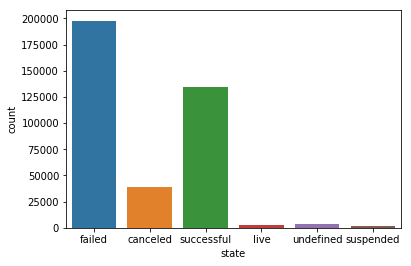

In [29]:
sns.countplot(data['state'])

Nous remarquons que nous pouvons considérer les catégories: canceled, failed, undefined et suspended comme étant un échec.


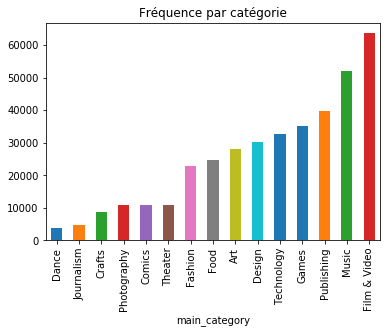

In [32]:
data.groupby('main_category')['main_category'].count().sort_values().plot.bar(title='Fréquence par catégorie')

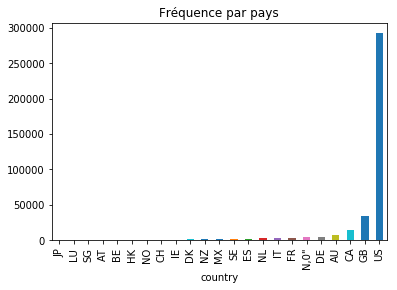

In [33]:
data.groupby('country')['country'].count().sort_values().plot.bar(title='Fréquence par pays')

### b- Données quantitatives

Text(0,0.5,'Frequency')

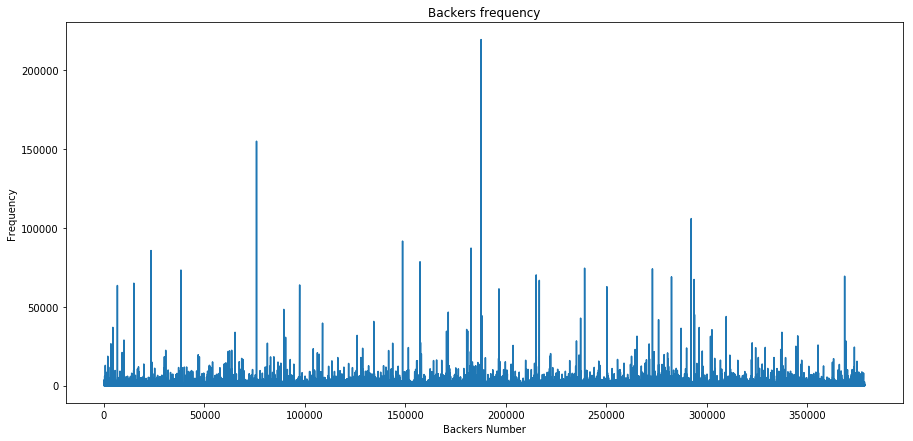

In [21]:
ax=data['backers'].plot.line(title="Backers frequency",figsize=(15,7))
ax.set_xlabel("Backers Number")
ax.set_ylabel("Frequency")

Text(0,0.5,'Frequency')

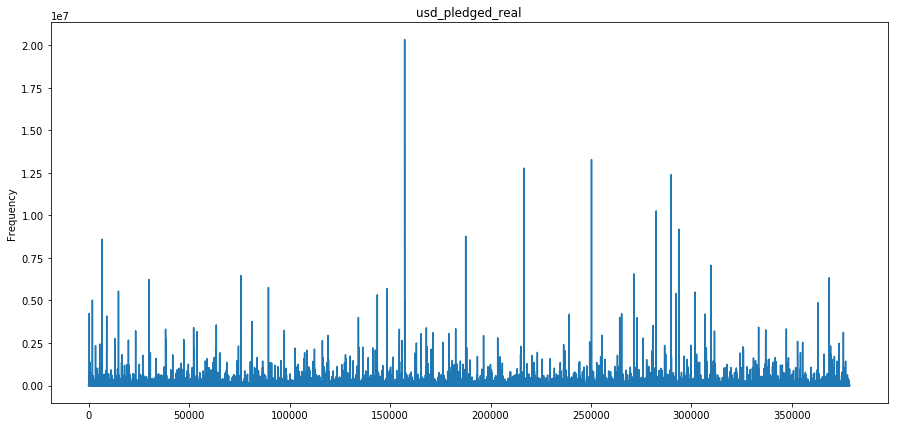

In [34]:
ax=data['usd_pledged_real'].plot.line(title="usd_pledged_real",figsize=(15,7))
ax.set_xlabel("")
ax.set_ylabel("Frequency")

Nous remarquons que certains projets ont un pledged très élevé par rapport à d'autres.

Text(0,0.5,'Frequency')

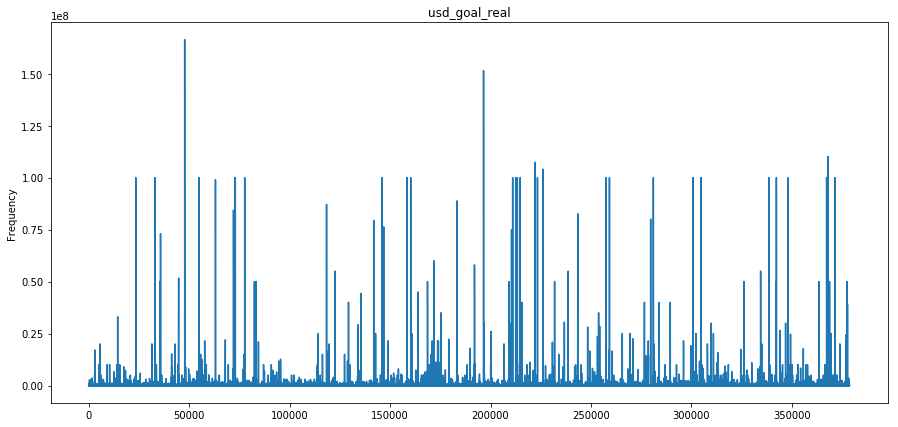

In [35]:
ax=data['usd_goal_real'].plot.line(title="usd_goal_real",figsize=(15,7))
ax.set_xlabel("")
ax.set_ylabel("Frequency")

### c- Dates

Text(0,0.5,'Frequency')

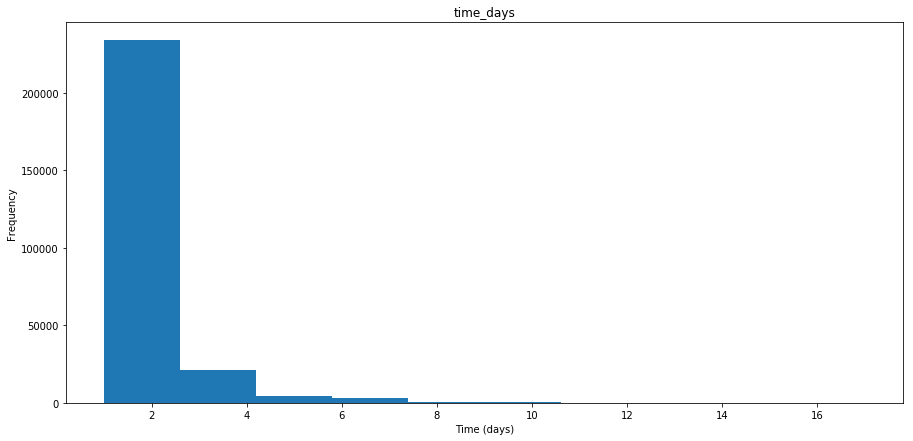

In [24]:

ax=data['time_days'].value_counts().plot.hist(title="time_days",figsize=(15,7),bins=10)
ax.set_xlabel("Time (days)")
ax.set_ylabel("Frequency")

La plupart des projets durent moins de 4 jours 

## 6. Analyse multivariée

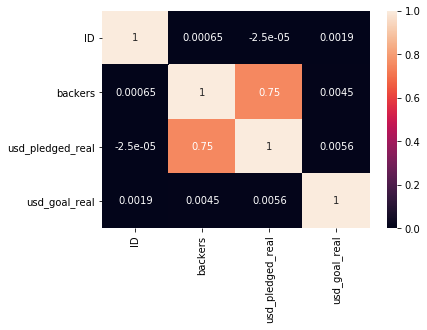

In [31]:
sns.heatmap(data.corr(), annot=True)

## 7. Conclusion

Les variables ***bakers***, ***usd_pledged_real***, ***time_days*** et ***usd_goal_real*** doivent présenter des corrélation assez forte avec state. Ainsi, elles peuvent être utilisées dans le processus de prédiction de la réussite des projets. 